## The Sparks Foundation - GRIP - Data Science & Business Analytics - APRIL 2021
### TASK 1 : Prediction using Supervised ML
#### Author : Akansha Koshta
#### Problem Statement :
What will be predicted score if a student studies for 9.25 hrs/ day?

# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Load the Data

In [2]:
datapath='https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
data=pd.read_csv(datapath)
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Data Preprocessing

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [4]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### There is no null values in the data

In [5]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


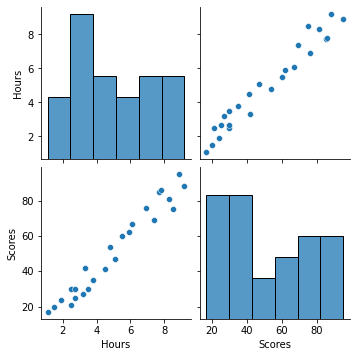

In [22]:
sns.pairplot(data)

# Scatter Plot

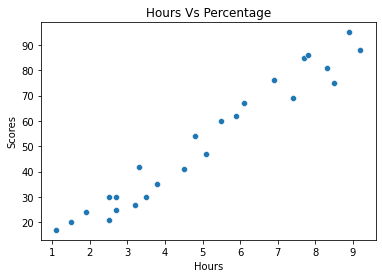

In [7]:
plt.title('Hours Vs Percentage')
sns.scatterplot(x='Hours',y='Scores',data=data)
plt.show()

#### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

# Preparing the data

In [3]:
x=data[['Hours']]          #Independent Variable
y=data[['Scores']]         #Dependent Variable

In [4]:
# Splitting the data into train & test data

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)


# Fitting Linear Regression Model To Training Set

In [5]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

# Predicting the Test Result 

In [6]:
y_pred=lr.predict(x_test)     #Predicted Values
y_pred

array([[16.84472176],
       [33.74557494],
       [75.50062397],
       [26.7864001 ],
       [60.58810646],
       [39.71058194],
       [20.8213931 ]])

In [7]:
y_test                         #Actual Values

,Scores
5,20
2,27
19,69
16,30
11,62
22,35
17,24


In [8]:
lr.coef_             #coefficient

array([[9.94167834]])

In [9]:
lr.intercept_          #intercept

array([1.93220425])

In [10]:
pd.DataFrame(np.c_[x_test,y_test,y_pred],columns=['Study_Hours','Students_Original_Scores','Students_Predicted_Scores'])

,Study_Hours,Students_Original_Scores,Students_Predicted_Scores
0,1.5,20.0,16.844722
1,3.2,27.0,33.745575
2,7.4,69.0,75.500624
3,2.5,30.0,26.786400
4,5.9,62.0,60.588106
5,3.8,35.0,39.710582
6,1.9,24.0,20.821393


# Fine Tuning the Model

In [11]:
from sklearn.metrics import r2_score

r2_score(y_test,y_pred)

0.9367661043365055

In [12]:
lr.score(x_test,y_test)

0.9367661043365055

#### Model is giving 93% accuracy.

# Scatter Plot for Test Values

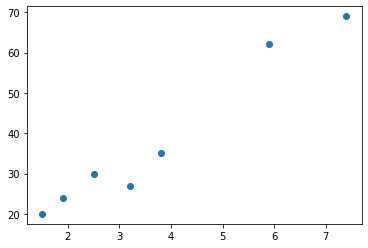

In [13]:
plt.scatter(x_test,y_test)

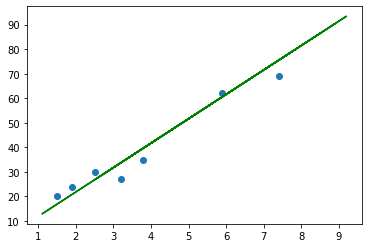

In [14]:
plt.scatter(x_test,y_test)
plt.plot(x_train,lr.predict(x_train),color='green')

# Making Prediction

In [28]:
import joblib as jb
jb.dump(lr,"Students_Predicted_Scores")

['Students_Predicted_Scores']

In [29]:
model=jb.load("Students_Predicted_Scores")

In [30]:
model.predict([[9.25]])

array([[93.89272889]])

#### No of Hours = 9.25
#### Predicted Score = 93.89272889
#### Therfore, the predicted score if a student studies for 9.25 hrs/day is about 93.89

#### Disclaimer:- You can use your own data in this and predict the score accordingly.

## Thank You